In [2]:
import numpy as np
import matplotlib.pyplot as plt
from engine import Heatmap, Noise, colors, gradient,WeightSum
from noises import perlin, worley

/home/mint/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


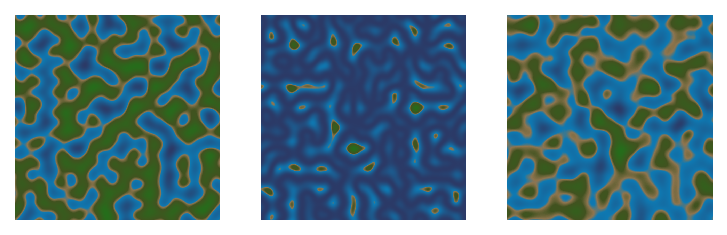

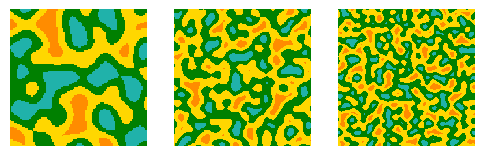

In [3]:
# Heatmap examples
Heatmap(perlin(10, 100), perlin(10, 100)**2, perlin(10, 100) + perlin(10, 100) + perlin(10, 100), scale = 1.5)
Heatmap(perlin(5, 20), perlin(10, 20), perlin(15, 20), cmap = colors(["darkorange", "gold", "green", "lightseagreen"]))

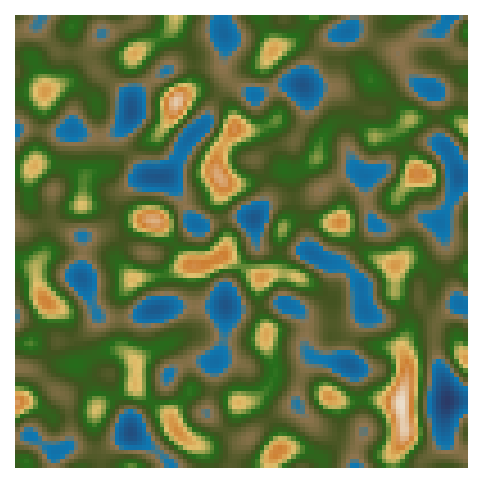

In [10]:
#Noises combination
weights = [0.2,0.3,0.4,0.7,0.8,0.9]
Heatmap(WeightSum(weights,[perlin(10,10) for _ in range(len(weights))])/sum(weights), scale = 1.5,cmap = "mountains")

In [5]:
# Simplest noise rendering
Noise(perlin, distance = 10, resolution = 10)

# Restricted (start, end, step) and cbar is passed to heatmap:
Noise(perlin, distance = (1, 50, 3), resolution = (1, 50, 1), cbar = True)

interactive(children=(IntSlider(value=10, description='distance', max=30, min=-10), IntSlider(value=10, descri…

interactive(children=(IntSlider(value=25, description='distance', max=50, min=1, step=3), IntSlider(value=25, …

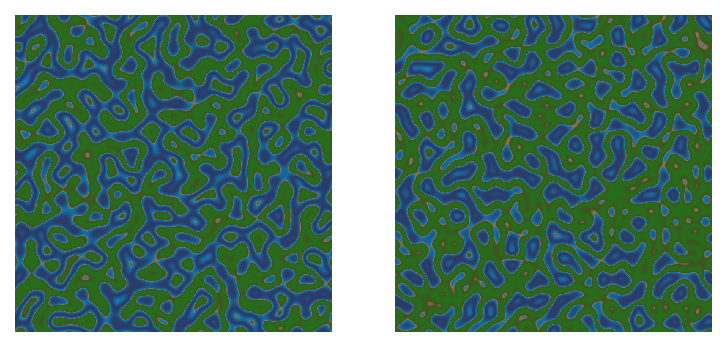

In [6]:
# Voodoo
Heatmap(np.sin(perlin(15, 50) * 2*np.pi), np.cos(perlin(15, 50) * 2*np.pi), scale = 1.5)

In [7]:
# set n to 1 for beauty and 2 for fireworks :)
Noise(worley, resolution=(10, 500, 5), points=(2, 100), n=(1, 3), scale=1.5, cmap='Spectral')

interactive(children=(IntSlider(value=255, description='resolution', max=500, min=10, step=5), IntSlider(value…